## For the demonstration of the Burt Adelson pyramid


In [192]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

# this function performs the linear combinaton of the images.
# you will have to enter your implementation here
# I_alpha = alpha1D1 + alpha2D2 + ... + alpha5D5 + R 
def linear_combination(alpha, d, r):
    # to be implemented!
    
    # SY solution:   
    i_alpha = r;    # initialization
 
    for i, a in enumerate(alpha):
        i_alpha = i_alpha + a * d[:,:,i]
        
    return i_alpha

def cost_function(alpha, i_orig, d, r):
    # compute linear combination
    i = linear_combination(alpha, d, r)

    # compute sum of absolute differences
    sad = np.sum(np.abs(i_orig - i))
    return sad

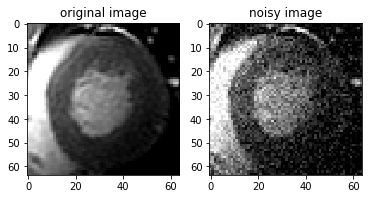

In [193]:
# load image data
data = np.load('data.npz')
I_orig = data['I_orig']
I_noisy = data['I_noisy']
R = data['R']
D = data['D']

# show original image
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(I_orig, cmap="gray")
plt.title('original image')
plt.draw()

# show noisy image
fig.add_subplot(1, 2, 2)
plt.imshow(I_noisy, cmap="gray")
plt.title('noisy image')
plt.draw()

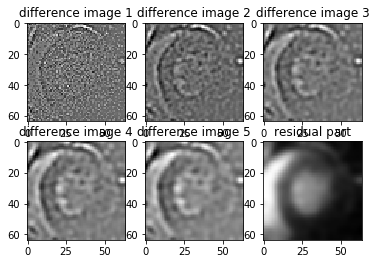

In [187]:
# show difference images and residual part
fig = plt.figure()
fig.add_subplot(2, 3, 1)
plt.imshow(D[:, :, 0], cmap="gray")
plt.title('difference image 1')
plt.draw()

fig.add_subplot(2, 3, 2)
plt.imshow(D[:, :, 1], cmap="gray")
plt.title('difference image 2')
plt.draw()

fig.add_subplot(2, 3, 3)
plt.imshow(D[:, :, 2], cmap="gray")
plt.title('difference image 3')
plt.draw()

fig.add_subplot(2, 3, 4)
plt.imshow(D[:, :, 3], cmap="gray")
plt.title('difference image 4')
plt.draw()

fig.add_subplot(2, 3, 5)
plt.imshow(D[:, :, 4], cmap="gray")
plt.title('difference image 5')
plt.draw()

fig.add_subplot(2, 3, 6)
plt.imshow(R, cmap="gray")
plt.title('residual part')
plt.draw()

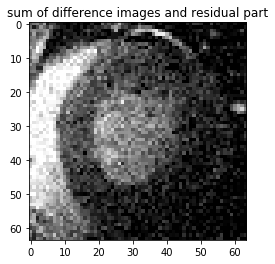

In [188]:
# show sum of difference imagesc and residual part
plt.figure()
plt.imshow(np.sum(D, -1) + R, cmap="gray")
plt.title('sum of difference images and residual part')
plt.show()

In [189]:
# find optimal linear combination
alpha0 = np.ones(5)
alpha = scipy.optimize.fmin(
    lambda a : cost_function(a, I_orig, D, R),
    x0=alpha0
)

Optimization terminated successfully.
         Current function value: 161.068730
         Iterations: 300
         Function evaluations: 495


array([-0.03615234,  2.99934831, -1.24093387, -2.37671265,  7.32618693])

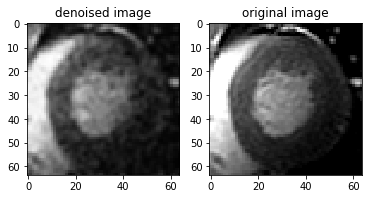

In [190]:
# show found linear combination
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(linear_combination(alpha, D, R), cmap="gray")
plt.title('denoised image')
plt.draw()

fig.add_subplot(1, 2, 2)
plt.imshow(I_orig, cmap="gray")
plt.title('original image')
plt.draw()
# added: alpha value
alpha

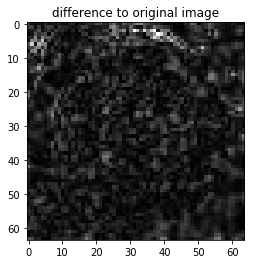

In [191]:
# show difference to original image
plt.figure()
plt.imshow(abs(I_orig - linear_combination(alpha, D, R)), cmap="gray")
plt.title('difference to original image')
plt.show()

Observation: alpha_1 has the smallest value after running the optimisation. This means that D1 doesn't carry much features from the original image. 
Therefore, the result matches with the second observation, that is, most noise seems to contain in the difference D1.